<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Creating-the-Gene-Table" data-toc-modified-id="Creating-the-Gene-Table-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Creating the Gene Table</a></span><ul class="toc-item"><li><span><a href="#Get-information-from-GFF-files" data-toc-modified-id="Get-information-from-GFF-files-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Get information from GFF files</a></span></li><li><span><a href="#(Optional)-KEGG-and-COGs" data-toc-modified-id="(Optional)-KEGG-and-COGs-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>(Optional) KEGG and COGs</a></span><ul class="toc-item"><li><span><a href="#Generate-nucleotide-fasta-files-for-CDS" data-toc-modified-id="Generate-nucleotide-fasta-files-for-CDS-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Generate nucleotide fasta files for CDS</a></span></li><li><span><a href="#Run-EggNOG-Mapper" data-toc-modified-id="Run-EggNOG-Mapper-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Run EggNOG Mapper</a></span></li><li><span><a href="#Get-KEGG-IDs" data-toc-modified-id="Get-KEGG-IDs-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Get KEGG IDs</a></span></li><li><span><a href="#Save-KEGG-information" data-toc-modified-id="Save-KEGG-information-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Save KEGG information</a></span></li><li><span><a href="#Save-COGs-to-annotation-dataframe" data-toc-modified-id="Save-COGs-to-annotation-dataframe-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Save COGs to annotation dataframe</a></span></li></ul></li><li><span><a href="#Uniprot-ID-mapping" data-toc-modified-id="Uniprot-ID-mapping-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Uniprot ID mapping</a></span></li><li><span><a href="#Add-Biocyc-Operon-information" data-toc-modified-id="Add-Biocyc-Operon-information-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Add Biocyc Operon information</a></span><ul class="toc-item"><li><span><a href="#Assign-unique-IDs-to-operons" data-toc-modified-id="Assign-unique-IDs-to-operons-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Assign unique IDs to operons</a></span></li></ul></li><li><span><a href="#Clean-up-and-save-annotation" data-toc-modified-id="Clean-up-and-save-annotation-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Clean up and save annotation</a></span></li><li><span><a href="#Final-statistics" data-toc-modified-id="Final-statistics-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Final statistics</a></span></li><li><span><a href="#Fill-missing-values" data-toc-modified-id="Fill-missing-values-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Fill missing values</a></span></li><li><span><a href="#GO-Annotations" data-toc-modified-id="GO-Annotations-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>GO Annotations</a></span></li></ul></li></ul></div>

# Creating the Gene Table
This notebook is copied from the [Pymodulon GitHub repository](https://github.com/SBRG/pymodulon/blob/master/docs/tutorials/creating_the_gene_table.ipynb)

In [1]:
from pymodulon.gene_util import *
import os

## Get information from GFF files

First, download the FASTA and GFF files for your organism and its plasmids from NCBI.

Enter the location of all your GFF files here:

In [2]:
gff_files = [os.path.join('..','data','external','genome.gff3')]

The following cell will convert all the GFF files into a single Pandas DataFrame for easy manipulation. Pseudogenes have multiple rows in a GFF file (one for each fragment), but only the first fragment will be kept.

In [3]:
keep_cols = ['accession','start','end','strand','gene_name','old_locus_tag','gene_product','ncbi_protein']

DF_annot = gff2pandas(gff_files,index='locus_tag')
DF_annot = DF_annot[keep_cols]

DF_annot.head()

,accession,start,end,strand,gene_name,old_locus_tag,gene_product,ncbi_protein
locus_tag,,,,,,,,
ZCP4_1768,CP006891.1,32.0,841.0,-,None,None,Phage capsid scaffolding protein (GPO) serine ...,AHB11032.1
ZCP4_1853,CP006893.1,80.0,2122.0,-,None,None,outer membrane receptor protein,AHB11110.1
ZCP4_1912,CP006895.1,450.0,680.0,+,None,None,hypothetical protein,AHB11159.1
ZCP4_1913,CP006895.1,677.0,1057.0,+,None,None,prophage maintenance system killer protein,AHB11160.1
ZCP4_1769,CP006891.1,974.0,2749.0,+,None,None,hypothetical protein,AHB11033.1


To ensure that the gene index used is identical to the expression matrix, load in your data.

In [4]:
log_tpm_file = os.path.join('..','data','processed_data','log_tpm.csv')
DF_log_tpm = pd.read_csv(log_tpm_file,index_col=0)
DF_log_tpm.head()

,SRX14953908,SRX14953909,SRX14953910,SRX14953911,SRX14953912,SRX14953913,SRX14953914,SRX14953915,SRX14953916,SRX14953917,...,Kiley_B_WT_-O2_Ctrl_B,Kiley_B_WT_-O2_Ctrl_C,Kiley_B_WT_-O2_NoFe_A,Kiley_B_WT_-O2_NoFe_B,Kiley_B_WT_-O2_NoFe_C,Kiley_B_WT_-O2_NoFe_DIP_A,Kiley_B_WT_-O2_NoFe_DIP_B,Kiley_B_WT_-O2_NoFe_DIP_C,Kiley_B_WT_-O2_Peroxide_A,Kiley_B_WT_-O2_Peroxide_C
Geneid,,,,,,,,,,,,,,,,,,,,,
ZCP4_0001,5.776818,5.914021,5.649816,5.770222,5.634935,7.319695,7.463173,7.188563,7.053904,5.838514,...,6.753442,6.817656,6.721457,6.920074,7.001997,6.937601,6.924576,6.861227,3.711552,5.354796
ZCP4_0002,6.729829,7.189463,6.933535,6.985748,6.964886,6.967124,7.090734,6.816982,6.805465,7.045432,...,6.776425,7.010168,6.752740,6.829927,6.808803,6.901704,6.883673,6.843651,3.466233,5.262928
ZCP4_0003,12.218703,12.306204,12.578060,12.411400,12.231102,8.677390,8.529919,8.539999,8.463958,12.439551,...,12.279739,11.998652,12.358939,12.264778,12.285701,12.185583,12.215878,12.003532,12.259624,12.380901
ZCP4_0004,9.114917,8.863234,8.965472,8.971342,9.270446,8.902531,8.916778,9.007271,8.876492,9.179108,...,8.102858,8.336005,8.253104,8.416695,8.319913,8.498210,8.605744,8.557059,9.386926,9.178899
ZCP4_0005,10.756126,10.485917,10.354395,10.437860,10.640383,14.226580,14.203014,13.921314,14.050698,10.794631,...,9.568082,9.261161,9.387126,9.473256,9.546165,9.413043,9.381610,9.326745,10.637753,11.172003


Check that the genes are the same in the expression dataset as in the annotation dataframe. Mismatched genes are listed below.

In [5]:
set(DF_log_tpm.index) - set(DF_annot.index)

{'ZCP4_0001', 'ZCP4_0002', 'ZCP4_0003', 'ZCP4_0004'}

## (Optional) KEGG and COGs

### Generate nucleotide fasta files for CDS

Enter the location of all your fasta files here:

In [6]:
fasta_files = [os.path.join('..','data','external','genome.fasta')]

The following code generates CDS files using your FASTA and GFF3 files

In [7]:
from Bio import SeqIO

cds_list = []
for fasta in fasta_files:
    for seq in SeqIO.parse(fasta, 'fasta'):  # Use SeqIO.parse to handle multiple sequences

        # Get gene information for genes in this fasta file
        df_genes = DF_annot[DF_annot.accession == seq.id]

        for i, row in df_genes.iterrows():
            cds = seq[int(row.start-1):int(row.end)]
            if row.strand == '-':
                cds = seq[int(row.start-1):int(row.end)].reverse_complement()
            cds.id = row.name
            cds.description = row.gene_name if pd.notnull(row.gene_name) else row.name
            cds_list.append(cds)

Save the CDS file

In [8]:
# save in increments for interpro, submit one file at a time at https://www.ebi.ac.uk/interpro/, download results and place in external/interpro_results
n = 0
while n < len(cds_list):
    temp_list = cds_list[n:n+100]
    cds_file = os.path.join('..','data','external','CDS_'+str(n)+'.fna')
    SeqIO.write(temp_list, cds_file, 'fasta')
    n+=100

In [9]:
cds_file = os.path.join('..','data','external','CDS.fna')
SeqIO.write(cds_list, cds_file, 'fasta')

1836

In [10]:
# do the same thing, but manually set genome.fasta and genome.gff
temp_fasta_files = ['../Zymomonas_mobilis/ZM4_files/genome.fasta']
temp_gff_files = ['../Zymomonas_mobilis/ZM4_files/genome.gff']
temp_DF_annot = gff2pandas(temp_gff_files,index='locus_tag')
cds_list = []
for fasta in temp_fasta_files:
    for seq in SeqIO.parse(fasta, 'fasta'):  # Use SeqIO.parse to handle multiple sequences

        # Get gene information for genes in this fasta file
        df_genes = temp_DF_annot[temp_DF_annot.accession == seq.id]

        for i, row in df_genes.iterrows():
            cds = seq[int(row.start-1):int(row.end)]
            if row.strand == '-':
                cds = seq[int(row.start-1):int(row.end)].reverse_complement()
            cds.id = row.name
            cds.description = row.gene_name if pd.notnull(row.gene_name) else row.name
            cds_list.append(cds)
            
SeqIO.write(cds_list, '../Zymomonas_mobilis/ZM4_files/CDS.fna', 'fasta')

1911

In [11]:
# read in interpro results
columns = ['run_id', 'gene_length', 'detector', 'annot_category', 'annotation', 'begin', 'end', '0', '1', '2', '3', '4', '5', '6']
mega_df = pd.DataFrame(columns = columns)
for file in os.listdir('../data/external/interpro_results'):
    if 'DS_Store' in file: continue
    f = open('../data/external/interpro_results/'+file, 'r')
    lines = f.readlines()
    f.close()
    df = pd.read_csv('../data/external/interpro_results/'+file, delimiter = '\t', names = columns, index_col = 0)
    mega_df = pd.concat([mega_df, df])
interpro_pred = []
for index in DF_annot.index:
    if index not in mega_df.index:
        annot = ''
    elif type(mega_df.loc[index]) == pd.core.frame.DataFrame:
        annots = list(set(mega_df.loc[index].annotation))
        annots.sort()
        annots = ';'.join(annots)
    elif type(mega_df.loc[index]) == pd.core.frame.DataFrame:
        annots = mega_df.loc[index].annotation.values[0]
    interpro_pred.append(annots)
DF_annot['interpro_annotation'] = interpro_pred

In [12]:
# then I ran BLAST between the CDS.fna files to map between ZM4 and CP4, here those are (adding to DF_annot)
f = open('../Zymomonas_mobilis/blast_results/results.txt', 'r')
lines = f.readlines()
f.close()
CP4_to_ZM = {}
for line in lines:
    ZM_locus = line.split('\t')[0]
    CP4_locus = line.split('\t')[1]
    score = float(line.split('\t')[2])
    # all scores above 70, so I'm just going to keep all
    CP4_to_ZM.update({CP4_locus : ZM_locus})
ZM4_locuses = []
for index in DF_annot.index:
    if index in CP4_to_ZM:
        ZM4_locuses.append(CP4_to_ZM[index])
    else:
        ZM4_locuses.append('')
DF_annot['ZM4_locus'] = ZM4_locuses

# map essentiality data onto this

In [13]:
# taking data from essentiality CRISPRi study
aerobic_df = pd.read_excel('../data/external/mbio.01487-23-s0007.xlsx', sheet_name = 'Aerobic essential')
aerobic_ZM4_to_score = {row['locus tag'] : row['aer_medLFC'] for _, row in aerobic_df.iterrows()}
anaerobic_df = pd.read_excel('../data/external/mbio.01487-23-s0007.xlsx', sheet_name = 'Anaerobic essential')
anaerobic_ZM4_to_score = {row['locus tag'] : row['ana_medLFC'] for _, row in anaerobic_df.iterrows()}

aerobic_scores = []
anaerobic_scores = []
for index, row in DF_annot.iterrows():
    ZM_gene = row['ZM4_locus']
    if ZM_gene in aerobic_ZM4_to_score:
        aerobic_scores.append(aerobic_ZM4_to_score[ZM_gene])
    else:
        aerobic_scores.append(0)
    if ZM_gene in anaerobic_ZM4_to_score:
        anaerobic_scores.append(anaerobic_ZM4_to_score[ZM_gene])
    else:
        anaerobic_scores.append(0)   
DF_annot['aerobic_essential'] = aerobic_scores
DF_annot['anaerobic_essential'] = anaerobic_scores

### Run EggNOG Mapper
1. Go to http://eggnog-mapper.embl.de/.
1. Upload the CDS.fna file from your organism directory (within the sequence_files folder)
1. Make sure to limit the taxonomy to the correct level
1. After the job is submitted, you must follow the link in your email to run the job.
1. Once the job completes (after ~4 hrs), download the annotations file.
1. Save the annotation file

### Get KEGG IDs

Once you have the EggNOG annotations, load the annotation file

In [14]:
eggnog_file = os.path.join('..','data','external','eggNOG_annotations.txt')

In [15]:
DF_eggnog = pd.read_csv(eggnog_file,sep='\t',skiprows=5,header=None)
eggnog_cols = ['query_name','seed eggNOG ortholog','seed ortholog evalue','seed ortholog score',
               'eggNOG OGs','max_annot_lvl','COG','Description','Preferred_name','GOs',
               'EC number','KEGG_ko','KEGG_pathway','KEGG_module','KEGG_reaction','KEGG_rclass',
               'BRITE','KEGG_TC','CAZy','BiGG Reaction','PFAMs']

DF_eggnog.columns = eggnog_cols

# Strip last three rows as they are comments
DF_eggnog = DF_eggnog.iloc[:-3]

# Set locus tag as index
DF_eggnog = DF_eggnog.set_index('query_name')
DF_eggnog.index.name = 'locus_tag'

DF_eggnog.head()

,seed eggNOG ortholog,seed ortholog evalue,seed ortholog score,eggNOG OGs,max_annot_lvl,COG,Description,Preferred_name,GOs,EC number,KEGG_ko,KEGG_pathway,KEGG_module,KEGG_reaction,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG Reaction,PFAMs
locus_tag,,,,,,,,,,,,,,,,,,,,
ZCP4_0005,264203.ZMO1352,2.180000e-159,448.0,"COG0670@1|root,COG0670@2|Bacteria,1MU69@1224|P...",204457|Sphingomonadales,S,Belongs to the BI1 family,-,-,-,ko:K06890,-,-,-,-,ko00000,-,-,-,Bax1-I
ZCP4_0006,264203.ZMO1351,3.880000e-240,660.0,"COG0412@1|root,COG0412@2|Bacteria,1MW7S@1224|P...",204457|Sphingomonadales,Q,dienelactone hydrolase,-,-,3.1.1.45,ko:K01061,"ko00361,ko00364,ko00623,ko01100,ko01110,ko0112...",-,"R03893,R05510,R05511,R06835,R06838,R08120,R081...","RC01018,RC01906,RC01907,RC02441,RC02467,RC0246...","ko00000,ko00001,ko01000",-,-,-,DLH
ZCP4_0007,264203.ZMO1350,3.280000e-180,501.0,"COG1058@1|root,COG1058@2|Bacteria,1MVG6@1224|P...",204457|Sphingomonadales,S,nucleotide-utilizing enzyme related to molybdo...,-,-,-,-,-,-,-,-,-,-,-,-,MoCF_biosynth
ZCP4_0008,264203.ZMO1348,4.050000e-206,569.0,"COG0024@1|root,COG0024@2|Bacteria,1MU99@1224|P...",204457|Sphingomonadales,E,Methionine aminopeptidase,map,-,3.4.11.18,ko:K01265,-,-,-,-,"ko00000,ko01000,ko01002",-,-,-,Peptidase_M24
ZCP4_0009,264203.ZMO1347,1.080000e-243,669.0,"COG2008@1|root,COG2008@2|Bacteria,1MWCR@1224|P...",204457|Sphingomonadales,E,Threonine aldolase,ltaA,-,4.1.2.48,ko:K01620,"ko00260,ko01100,ko01110,ko01120,ko01130,ko0123...",-,"R00751,R06171","RC00312,RC00372","ko00000,ko00001,ko01000",-,-,-,Beta_elim_lyase


Now we will pull the KEGG information from the eggNOG file, including orthology, pathway, module, and reactions for each gene.

In [16]:
DF_kegg = DF_eggnog[['KEGG_pathway','KEGG_module','KEGG_reaction']]

# Melt dataframe
DF_kegg = DF_kegg.reset_index().melt(id_vars='locus_tag') 

# Remove null values
DF_kegg = DF_kegg[DF_kegg.value.notnull()]

# Split comma-separated values into their own rows
list2struct = []
for name,row in DF_kegg.iterrows():
    for val in row.value.split(','):
        list2struct.append([row.locus_tag,row.variable,val])

DF_kegg = pd.DataFrame(list2struct,columns=['gene_id','database','kegg_id'])

# Remove ko entries, as only map entries are searchable in KEGG pathway
DF_kegg = DF_kegg[~DF_kegg.kegg_id.str.startswith('ko')]

DF_kegg.head()

,gene_id,database,kegg_id
0,ZCP4_0005,KEGG_pathway,-
8,ZCP4_0006,KEGG_pathway,map00361
9,ZCP4_0006,KEGG_pathway,map00364
10,ZCP4_0006,KEGG_pathway,map00623
11,ZCP4_0006,KEGG_pathway,map01100


### Save KEGG information

In [17]:
gene_to_kegg_ids = {}
for index, row in DF_kegg.iterrows():
    if 'map' not in row['kegg_id']:
        continue
    if row['gene_id'] not in gene_to_kegg_ids:
        gene_to_kegg_ids.update({row['gene_id'] : set()})
    gene_to_kegg_ids[row['gene_id']].add(row['kegg_id'])
kegg_maps = []
for index in DF_annot.index:
    if index in gene_to_kegg_ids:
        new_vals = list(gene_to_kegg_ids[index])
        new_vals.sort()
        kegg_maps.append(';'.join(new_vals))
    else:
        kegg_maps.append('')
DF_annot['kegg_maps'] = kegg_maps


# also save EC information
gene_to_EC = {}
for index, row in DF_eggnog.iterrows():
    if '.' in row['EC number']:
        gene_to_EC.update({index : row['EC number']})
EC_nums = []
for index in DF_annot.index:
    if index in gene_to_EC:
        EC_nums.append(gene_to_EC[index])
    else:
        EC_nums.append('')
DF_annot['EC_number'] = EC_nums

In [18]:
DF_kegg.to_csv(os.path.join('..','data','external','kegg_mapping.csv'))

### Save COGs to annotation dataframe

In [19]:
DF_annot['COG'] = DF_eggnog.COG
DF_annot['EggNOG_ID'] = DF_eggnog['seed eggNOG ortholog']

# Make sure COG only has one entry per gene
DF_annot['COG'] = [item[0] if isinstance(item,str) else item for item in DF_annot['COG']]

## Uniprot ID mapping
Save the NCBI protein ID to a file for uniprot mapping

In [20]:
new_id_map = []
with open(os.path.join('..','data','external','uniprot_input.txt'), "w") as file:
    for item in DF_annot.EggNOG_ID.fillna('').values:
        if '264203' not in item:
            new_id_map.append(item)
            continue
        new_id_map.append('zmo:'+str(item).split('.')[1])
        file.write('zmo:'+str(item).split('.')[1]+"\n")
    file.close()
DF_annot['EggNOG_ID'] = new_id_map

Map the best match EggNOG matches to Zymomonas strains to Uniprot IDs
1. Go to https://www.uniprot.org/id-mapping/.
1. Upload the `uniprot_input.txt` file from the `external` folder
1. For **"From database"**, choose **KEGG**
1. Once the mapping completes, download the annotations file by clicking Download on the results page. Choose **"Download all"**, **"Format TSV"** 
1. Save the annotation file to the `external` folder, rename to `uniprot_mapping.tsv`

In [21]:
pd.read_csv(os.path.join('..','data','external','uniprot_mapping.tsv'),sep = '\t')

,From,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length
0,zmo:ZMO1352,D2YW23,unreviewed,D2YW23_ZYMMO,Inner membrane protein YbhL,ZMO1352,Zymomonas mobilis subsp. mobilis (strain ATCC ...,242
1,zmo:ZMO1351,Q5NMT5,unreviewed,Q5NMT5_ZYMMO,Carboxymethylenebutenolidase (EC 3.1.1.45),ZMO1351,Zymomonas mobilis subsp. mobilis (strain ATCC ...,334
2,zmo:ZMO1350,H2VFS2,unreviewed,H2VFS2_ZYMMO,Molybdopterin binding domain protein,ZMO1350,Zymomonas mobilis subsp. mobilis (strain ATCC ...,253
3,zmo:ZMO1348,H2VFN6,unreviewed,H2VFN6_ZYMMO,Methionine aminopeptidase (MAP) (MetAP) (EC 3....,map ZMO1348,Zymomonas mobilis subsp. mobilis (strain ATCC ...,276
4,zmo:ZMO1347,H2VFP6,unreviewed,H2VFP6_ZYMMO,Aromatic amino acid beta-eliminating lyase/thr...,ZMO1347,Zymomonas mobilis subsp. mobilis (strain ATCC ...,337
...,...,...,...,...,...,...,...,...
1151,zmo:ZMO1366,Q9Z5U7,reviewed,RS4_ZYMMO,Small ribosomal subunit protein uS4 (30S ribos...,rpsD ZMO1366,Zymomonas mobilis subsp. mobilis (strain ATCC ...,204
1152,zmo:ZMO1365,Q5NMS1,unreviewed,Q5NMS1_ZYMMO,diguanylate cyclase (EC 2.7.7.65),ZMO1365,Zymomonas mobilis subsp. mobilis (strain ATCC ...,1045
1153,zmo:ZMO1364,Q5NMS2,unreviewed,Q5NMS2_ZYMMO,Coproporphyrinogen-III oxidase (EC 1.3.98.3),ZMO1364,Zymomonas mobilis subsp. mobilis (strain ATCC ...,453
1154,zmo:ZMO1360,P06672,reviewed,PDC_ZYMMO,Pyruvate decarboxylase (PDC) (EC 4.1.1.1),pdc ZMO1360,Zymomonas mobilis subsp. mobilis (strain ATCC ...,568


In [22]:
mapping_uniprot = pd.read_csv(os.path.join('..','data','external','uniprot_mapping.tsv'),sep = '\t')
mapping_uniprot = mapping_uniprot.rename(columns = {'Gene Names' : 'uniprot_gene_name', 'From':'EggNOG_ID','Entry':'uniprot'})[['EggNOG_ID','uniprot','uniprot_gene_name']]
mapping_uniprot = mapping_uniprot.drop_duplicates('EggNOG_ID')
mapping_uniprot.head()

,EggNOG_ID,uniprot,uniprot_gene_name
0,zmo:ZMO1352,D2YW23,ZMO1352
1,zmo:ZMO1351,Q5NMT5,ZMO1351
2,zmo:ZMO1350,H2VFS2,ZMO1350
3,zmo:ZMO1348,H2VFN6,map ZMO1348
4,zmo:ZMO1347,H2VFP6,ZMO1347


In [23]:
# Merge with current annotation
DF_annot = pd.merge(DF_annot.reset_index(),mapping_uniprot,how='left',on='EggNOG_ID')
DF_annot.set_index('locus_tag',inplace=True)
gene_names = []
for index, row in DF_annot.iterrows():
    gene_name = None
    if row['gene_name'] == None:
        uni_name = str(row['uniprot_gene_name'])
        if uni_name != 'nan' and ' ' in uni_name:
            gene_name = uni_name.split(' ')[0]
            if 'zmo' in gene_name.lower():
                gene_name = None
    gene_names.append(gene_name) 
DF_annot['gene_name'] = gene_names
DF_annot.head()

,accession,start,end,strand,gene_name,old_locus_tag,gene_product,ncbi_protein,interpro_annotation,ZM4_locus,aerobic_essential,anaerobic_essential,kegg_maps,EC_number,COG,EggNOG_ID,uniprot,uniprot_gene_name
locus_tag,,,,,,,,,,,,,,,,,,
ZCP4_1768,CP006891.1,32.0,841.0,-,None,None,Phage capsid scaffolding protein (GPO) serine ...,AHB11032.1,C-terminal region of a signal peptide.;Hydroph...,ZMO1_ZMOp36x043,0.0,0.0,,,S,702113.PP1Y_AT3685,NaN,NaN
ZCP4_1853,CP006893.1,80.0,2122.0,-,None,None,outer membrane receptor protein,AHB11110.1,C-terminal region of a signal peptide.;Hydroph...,ZMO1_ZMOp39x012,0.0,0.0,,,P,555217.Zmob_1838,NaN,NaN
ZCP4_1912,CP006895.1,450.0,680.0,+,None,None,hypothetical protein,AHB11159.1,C-terminal region of a signal peptide.;Hydroph...,ZMO1_ZMOp39x020,0.0,0.0,,,-,1296990.H845_3278,NaN,NaN
ZCP4_1913,CP006895.1,677.0,1057.0,+,None,None,prophage maintenance system killer protein,AHB11160.1,C-terminal region of a signal peptide.;Hydroph...,ZMO1_ZMOp39x021,0.0,0.0,,,S,107635.AZUO01000001_gene1405,NaN,NaN
ZCP4_1769,CP006891.1,974.0,2749.0,+,None,None,hypothetical protein,AHB11033.1,SignalP-TM;SignalP-noTM,ZMO1_ZMOp36x042,0.0,0.0,,,S,1522072.IL54_0955,NaN,NaN


In [24]:
DF_annot.sort_values(by = 'gene_name')

,accession,start,end,strand,gene_name,old_locus_tag,gene_product,ncbi_protein,interpro_annotation,ZM4_locus,aerobic_essential,anaerobic_essential,kegg_maps,EC_number,COG,EggNOG_ID,uniprot,uniprot_gene_name
locus_tag,,,,,,,,,,,,,,,,,,
ZCP4_0386,CP006818.1,425778.0,426584.0,+,aat,None,leucyl/phenylalanyl-tRNA--protein transferase,AHB09706.1,SignalP-TM;SignalP-noTM,ZMO1_ZMO0927,0.000000,0.000000,,2.3.2.6,O,zmo:ZMO0927,Q5NP09,aat ZMO0927
ZCP4_0684,CP006818.1,776548.0,777489.0,-,accA,None,acetyl-CoA carboxylase carboxyltransferase sub...,AHB09993.1,Insulin-like growth factor-binding protein (IG...,ZMO1_ZMO0599,0.000000,0.000000,map00061;map00620;map00640;map00720;map01100;m...,"2.1.3.15,6.4.1.2",I,zmo:ZMO0599,Q5NPY2,accA ZMO0599
ZCP4_0699,CP006818.1,789224.0,790078.0,+,accD,None,acetyl-CoA carboxylase carboxyltransferase sub...,AHB10008.1,SignalP-TM;SignalP-noTM,ZMO1_ZMO0583,0.000000,0.000000,map00061;map00620;map00640;map00720;map01100;m...,"2.1.3.15,6.4.1.2",I,zmo:ZMO0583,Q5NPZ8,accD ZMO0583
ZCP4_0061,CP006818.1,70267.0,70503.0,+,acpP,None,acyl carrier protein,AHB09399.1,Integrins beta chain cysteine-rich domain sign...,ZMO1_ZMO1279,0.000000,0.000000,,,I,zmo:ZMO1279,Q5NN07,acpP ZMO1279
ZCP4_1454,CP006818.1,1627254.0,1627658.0,-,acpS,None,holo-(acyl-carrier-protein) synthase,AHB10735.1,SignalP-TM;SignalP-noTM,ZMO1_ZMO1709,-4.266232,-2.765203,map00770,2.7.8.7,I,zmo:ZMO1709,Q5NLS7,acpS ZMO1709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZCP4_1760,CP006818.1,1990403.0,1993540.0,-,None,None,diguanylate cyclase (GGDEF) domain-containing ...,AHB11025.1,Integrins beta chain cysteine-rich domain sign...,ZMO1_ZMO1365,0.000000,0.000000,,,T,zmo:ZMO1365,Q5NMS1,ZMO1365
ZCP4_1761,CP006818.1,1993874.0,1995235.0,-,None,None,oxygen-independent coproporphyrinogen III oxidase,AHB11026.1,C-terminal region of a signal peptide.;Hydroph...,ZMO1_ZMO1364,0.000000,0.000000,,,H,zmo:ZMO1364,Q5NMS2,ZMO1364
ZCP4_1762,CP006818.1,1995263.0,1995484.0,-,None,None,hypothetical protein,AHB11027.1,C-terminal region of a signal peptide.;Hydroph...,ZMO1_ZMO2068,0.000000,0.000000,,,NaN,,NaN,NaN


## Add Biocyc Operon information

To obtain operon information from Biocyc, follow the steps below

1. Go to [Biocyc.org](https://biocyc.org/) (you may need to create an account and/or login)
2. Change the organism database to your organism/strain
3. Select **SmartTables** -> **Special SmartTables**
4. Select **"All genes of \<organism\>"**
5. Select the **"Gene Name"** column
6. Under **"ADD TRANSFORM COLUMN"** select **"Genes in same transcription unit"**
7. Select the **"Genes in same transcription unit"** column
8. Under **"ADD PROPERTY COLUMN"** select **"Accession-1"**
9. Under **OPERATIONS**, select **"Export"** -> **"to Spreadsheet File..."**
10. Select **"common names"** and click **"Export smarttable"**
11. Add file location below and run the code cell

In [25]:
biocyc_file = os.path.join('..','data','external','biocyc_annotations.txt')

DF_biocyc = pd.read_csv(biocyc_file,sep='\t')

# Remove genes with no accession
DF_biocyc = DF_biocyc[DF_biocyc['Accession-1'].notnull()]

# Set the accession (i.e. locus tag) as index
DF_biocyc = DF_biocyc.set_index('Accession-1').sort_values('Left-End-Position')

# Specific for B. subtilis: Fix locus tags
DF_biocyc.index = DF_biocyc.index.str.replace('BSU','BSU_')

# Only keep genes in the final annotation file
DF_biocyc = DF_biocyc.reindex(DF_annot.index)

# Reformat transcription units
DF_biocyc['operon_list'] = DF_biocyc['Accession-1.1'].apply(reformat_biocyc_tu)

# Fill None with locus tags
DF_biocyc['operon_list'].fillna(DF_biocyc.index.to_series(), inplace=True)

DF_biocyc.head()

/tmp/ipykernel_1396/2603300462.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  DF_biocyc['operon_list'].fillna(DF_biocyc.index.to_series(), inplace=True)


,Gene Name,Left-End-Position,Right-End-Position,Product,Genes in same transcription unit,Accession-1.1,operon_list
locus_tag,,,,,,,
ZCP4_1768,NaN,NaN,NaN,NaN,NaN,NaN,ZCP4_1768
ZCP4_1853,NaN,NaN,NaN,NaN,NaN,NaN,ZCP4_1853
ZCP4_1912,NaN,NaN,NaN,NaN,NaN,NaN,ZCP4_1912
ZCP4_1913,NaN,NaN,NaN,NaN,NaN,NaN,ZCP4_1913
ZCP4_1769,NaN,NaN,NaN,NaN,NaN,NaN,ZCP4_1769


### Assign unique IDs to operons

The following code assigns unique names to each operon

In [26]:
# Get all operons
operons = DF_biocyc['operon_list'].unique()

# Map each operon to a unique string
operon_dict = {operon: "Op"+str(i) for i, operon in enumerate(operons)}

# Add names to dataframe
DF_biocyc['operon'] = [operon_dict[op] for op in DF_biocyc["operon_list"]]

DF_biocyc.head()

,Gene Name,Left-End-Position,Right-End-Position,Product,Genes in same transcription unit,Accession-1.1,operon_list,operon
locus_tag,,,,,,,,
ZCP4_1768,NaN,NaN,NaN,NaN,NaN,NaN,ZCP4_1768,Op0
ZCP4_1853,NaN,NaN,NaN,NaN,NaN,NaN,ZCP4_1853,Op1
ZCP4_1912,NaN,NaN,NaN,NaN,NaN,NaN,ZCP4_1912,Op2
ZCP4_1913,NaN,NaN,NaN,NaN,NaN,NaN,ZCP4_1913,Op3
ZCP4_1769,NaN,NaN,NaN,NaN,NaN,NaN,ZCP4_1769,Op4


Finally, merge the Biocyc information with the main annotation DataFrame

In [27]:
DF_annot['operon'] = DF_biocyc['operon']

## regulator info from https://pmc.ncbi.nlm.nih.gov/articles/PMC7566282/

In [28]:
SI1 = pd.read_excel('../data/external/10_1128mSystems_00250-20/mSystems.00250-20-sd001.xlsx', sheet_name = 'TSSs')
SI2 = pd.read_excel('../data/external/10_1128mSystems_00250-20/mSystems.00250-20-sd002.xlsx', sheet_name = 'Z. mobilis')
rpoD_model_regulated = SI2.TSS.values
true_false = []
for TSS in SI1.Name:
    true_false.append(TSS in rpoD_model_regulated)
genes = set(SI1[true_false].Gene)
len(genes)

1054

# integrate DAP-seq data

In [29]:
df = pd.read_csv('../data/external/DAP_seq/DAPseq_peak_to_gene_mapping.tsv', delimiter = '\t')
gene_to_regs = {}
TF_to_DF_annot_index = {}
for _, row in df.iterrows():
    gene = row['gene']
    TF = row['TF']
    if TF not in TF_to_DF_annot_index:
        try:
            locus = DF_annot['ZMO1_'+TF.replace('t','') == DF_annot['ZM4_locus']].index[0]
        except:
            locus = TF
        TF_to_DF_annot_index.update({TF : locus})
    TF = TF_to_DF_annot_index[TF]
    if gene not in gene_to_regs:
        gene_to_regs.update({gene : []})
    gene_to_regs[gene].append(TF)
regs_list = []
for _, row in DF_annot.iterrows():
    gene = row['ZM4_locus']
    regs = []
    if gene in gene_to_regs:
        regs = gene_to_regs[gene]
        regs.sort()
    regs_list.append(regs)
DF_annot['regulator'] = regs_list

# save to TRN location
output_df = pd.DataFrame(columns = ['regulator', 'gene_id'])
regulators = []
genes = []
for gene, regs in gene_to_regs.items():
    try:
        gene = DF_annot[gene.replace('t','') == DF_annot['ZM4_locus']].index[0]
    except:
        continue
    for reg in regs:
        if 'CP4' not in reg:
            continue
        regulators.append(reg)
        genes.append(gene)
output_df['regulator'] = regulators
output_df['gene_id'] = genes
output_df = output_df.set_index('regulator')
output_df.to_csv('../data/external/TRN.csv')

# add on flux through models and model gene essentiality

In [31]:
# add on the highest reported flux for each gene that has flux reported in the model
import pickle

conditions = ['anaero_xylose', 'anaero_glucose', 'aero_xylose', 'aero_glucose']

for condition in conditions:
    # flux information
    pickle_in = open('../../iM_modeling/data/'+condition+'_gene_to_fluxes.pkl', 'rb')
    gene_to_flux = pickle.load(pickle_in)
    pickle_in.close()
    new_col = []
    for locus in DF_annot.ZM4_locus:
        locus = locus.replace('ZMO1_','')
        if locus != '' and locus in gene_to_flux:
            new_col.append(max([abs(val) for val in gene_to_flux[locus]]))
        else:
            new_col.append('')
    DF_annot[condition+'_model_flux'] = new_col     
    
    # gene essentiality information
    pickle_in = open('../../iM_modeling/data/'+condition+'_gene_to_growth_perc_change.pkl', 'rb')
    gene_to_growth_perc_change = pickle.load(pickle_in)
    pickle_in.close()
    new_col = []
    for locus in DF_annot.ZM4_locus:
        locus = locus.replace('ZMO1_','')
        if locus != '' and locus in gene_to_growth_perc_change:
            new_col.append(min([abs(val) for val in gene_to_growth_perc_change[locus]]))
        else:
            new_col.append('')
    DF_annot[condition+'_model_growth_perc_change'] = new_col  

# MEME suite to predict TF binding interactions from sequence

In [32]:
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq

def extract_promoters(gff_file, fasta_file, upstream_bp=1000):
    """Extract promoter regions from a GFF file and genome FASTA."""
    genome = SeqIO.to_dict(SeqIO.parse(fasta_file, "fasta"))
    promoters = []

    with open(gff_file) as gff:
        for line in gff:
            if not line.startswith("#"):
                fields = line.strip().split("\t")
                if fields[2] == "gene":  # Adjust if necessary for your GFF
                    chrom = fields[0]
                    start = int(fields[3])
                    end = int(fields[4])
                    strand = fields[6]
                    gene_id = fields[-1].split(";")[0]  # Extract gene name
                    
                    if strand == "+":
                        promoter_start = max(0, start - upstream_bp)
                        promoter_seq = genome[chrom].seq[promoter_start:start]
                    else:  # Reverse strand
                        promoter_end = min(len(genome[chrom]), end + upstream_bp)
                        promoter_seq = genome[chrom].seq[end:promoter_end].reverse_complement()
                    
                    promoters.append((gene_id, str(promoter_seq)))
    
    return promoters

def save_promoters_to_fasta(promoters, output_fasta):
    """Save promoter sequences to a FASTA file."""
    records = [
        SeqRecord(Seq(seq), id=gene_id, description="")
        for gene_id, seq in promoters
    ]
    SeqIO.write(records, output_fasta, "fasta")


import json

def convert_pwm_to_meme(json_file, output_meme):
    """Convert PRODORIC JSON PWM to MEME motif format."""
    with open(json_file, "r") as file:
        data = json.load(file)

    with open(output_meme, "w") as meme_out:
        # Write MEME header
        meme_out.write("MEME version 4\n\n")
        meme_out.write("ALPHABET= ACGT\n\n")
        meme_out.write("strands: + -\n\n")
        meme_out.write("Background letter frequencies (from uniform distribution):\n")
        meme_out.write("A 0.25 C 0.25 G 0.25 T 0.25\n\n")

        # Write motifs
        for motif in data:
            if motif.get("deprecated", False):
                continue  # Skip deprecated motifs
            
            name = motif["name"]+'_'+motif['organism']['name'].replace(' ','_')
            pwm = motif["pwm"]
            length = len(pwm["A"])  # Assuming all PWM rows have equal length

            meme_out.write(f"MOTIF {name}\n")
            meme_out.write("letter-probability matrix: ")
            meme_out.write(f"alength= 4 w= {length} nsites= 20 E= 0.0\n")

            # Write the PWM as rows for each position
            for i in range(length):
                row = [pwm[base][i] for base in "ACGT"]
                total = sum(row)
                if total == 0: # if no probability listed, MEME expects .25 for each
                    row = [.25 for _ in row]
                if total > 0:  # Normalize if not already
                    row = [x / total for x in row]
                meme_out.write(" ".join(f"{value:.6f}" for value in row) + "\n")
            meme_out.write("\n")
            
            
import subprocess

def run_fimo(meme_file, promoters_fasta, output_dir):
    """Run FIMO to find motif matches in promoter sequences."""
    subprocess.run([
        "fimo", 
        "--oc", output_dir,  # Output directory
        meme_file,           # MEME motif file
        promoters_fasta      # Promoter sequences FASTA file
    ], check=True)

In [33]:
# run the functions, False by default because its very slow
if False:
    fasta_file = '../Zymomonas_mobilis/sequence_files/genome.fasta'
    gff_file = '../Zymomonas_mobilis/sequence_files/genome.gff3'
    motif_file = '../data/external/PRODORIC.json'
    promoters_file = '../Zymomonas_mobilis/sequence_files/promoter_sequences.fasta'
    meme_file = '../data/external/PRODORIC_MEME_format.meme'
    upstream_bp = 1000

    promoters = extract_promoters(gff_file, fasta_file, upstream_bp = upstream_bp)
    save_promoters_to_fasta(promoters, promoters_file)
    meme_format = convert_pwm_to_meme(motif_file, meme_file)
    run_fimo(meme_file, promoters_file, '../data/interim/FIMO_output/')

# now we need to convert this into DF_annot
fimo_df = pd.read_csv('../data/interim/FIMO_output/fimo.tsv', delimiter = '\t')
fimo_df = fimo_df[fimo_df['q-value'] < 0.05]
new_col = []
for index, row in DF_annot.iterrows():
    bby_df = fimo_df[[index in str(val) for val in fimo_df.sequence_name]]
    regulators = list(set(bby_df.motif_id))
    regulators.sort()
    new_col.append(regulators)
DF_annot['FIMO_regulators'] = new_col

# add on proteomics for xylose

In [34]:
# load in and merge proteomics data
proteomics_df = pd.read_excel('../data/external/proteomics_10_3389_fmicb_2019_02596.XLSX', sheet_name = 'LFQ', index_col = 0)

col_opts = ['SynH3- T1', 'SynH3- T2', 'SynH3- T3', 'SynH3- T4', 
            'SynH3 T1', 'SynH3 T2', 'SynH3 T3', 'SynH3 T4'
            ]
control_cols = ['SynH3- T1', 'SynH3 T1']
opt_to_name = {
    'SynH3- T1' : 'LDI_early_glucose_fold_change',
    'SynH3- T2' : 'LDI_late_glucose_fold_change',
    'SynH3- T3' : 'LDI_early_xylose_fold_change',
    'SynH3- T4' : 'LDI_late_xylose_fold_change', 
    'SynH3 T1' : 'no_LDI_early_glucose_fold_change',
    'SynH3 T2' : 'no_LDI_late_glucose_fold_change',
    'SynH3 T3' : 'no_LDI_early_xylose_fold_change',
    'SynH3 T4' : 'no_LDI_late_xylose_fold_change',
}

# find overlap between ICA genes and proteomics data
ZM4_to_index = {row['ZM4_locus'].split('_')[1] : index for index, row in DF_annot.iterrows() if 'ZM' in row['ZM4_locus']}
ZM4_locus = [val.split('_')[1] for val in DF_annot.ZM4_locus if 'ZM' in val]
overlap = list(set(ZM4_locus).intersection(proteomics_df.index))
proteomics_df = proteomics_df.loc[overlap]
proteomics_df = proteomics_df  / proteomics_df.sum() # standardize by sample

# let's create the standards
col_to_std = {}
for col in control_cols:
    cols_use = [col+' Rep1', col+' Rep2', col+' Rep3']
    meaned_df = proteomics_df[cols_use].mean(axis = 1)
    col_to_std.update({col.split(' ')[0] : meaned_df})
for col in col_opts:
    control = col.split(' ')[0]
    cols_use = [col+' Rep1', col+' Rep2', col+' Rep3']
    meaned_df = proteomics_df[cols_use].mean(axis = 1)
    fold_change = (meaned_df / col_to_std[control]).rename(ZM4_to_index)
    DF_annot[opt_to_name[col]] = fold_change

## Clean up and save annotation

First, we will re-order the annotation columns

In [35]:
order = ['gene_name','accession','start','end','strand','gene_product','COG',
         'regulator', 'uniprot', 'operon', 'kegg_maps', 'EC_number',
         'ZM4_locus', 'aerobic_essential', 'anaerobic_essential',
         'interpro_annotation', 'anaero_xylose_model_flux',
         'anaero_glucose_model_flux', 'aero_xylose_model_flux', 'aero_glucose_model_flux',
         'anaero_xylose_model_growth_perc_change', 'anaero_glucose_model_growth_perc_change',
         'aero_xylose_model_growth_perc_change', 'aero_glucose_model_growth_perc_change',
         'FIMO_regulators',
         'LDI_early_glucose_fold_change', 'LDI_late_glucose_fold_change',
         'LDI_early_xylose_fold_change', 'LDI_late_xylose_fold_change', 
         'no_LDI_early_glucose_fold_change', 'no_LDI_late_glucose_fold_change',
         'no_LDI_early_xylose_fold_change', 'no_LDI_late_xylose_fold_change',
        ]
    
DF_annot = DF_annot[order]

## Final statistics

The following graphs show how much information is available for the organism.

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('ticks')

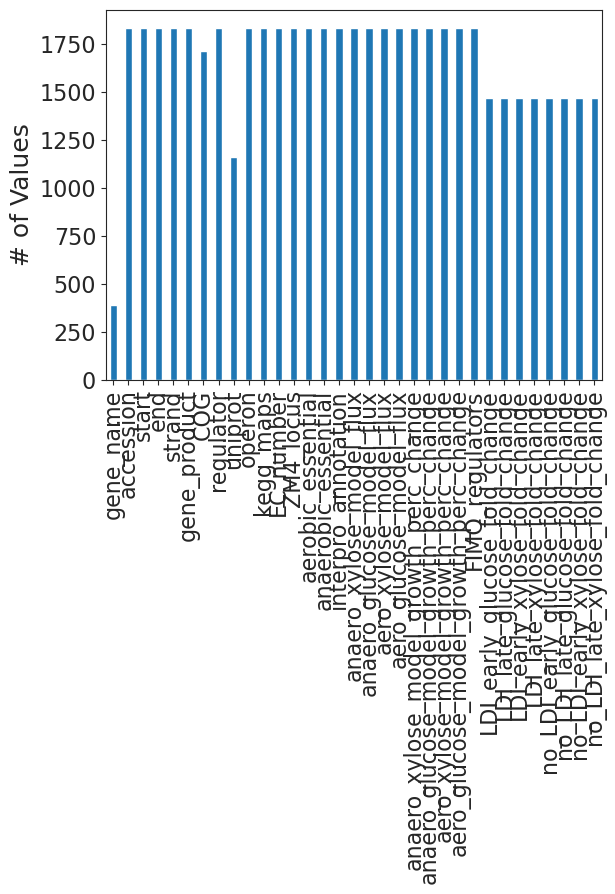

In [37]:
fig,ax = plt.subplots()
DF_annot.count().plot(kind='bar',ax=ax)
ax.set_ylabel('# of Values',fontsize=18)
ax.tick_params(labelsize=16)

## Fill missing values

Some organisms are missing gene names, so these will be filled with locus tag gene names.

In [38]:
# Fill in missing gene names with locus tag names
DF_annot['tmp_name'] = DF_annot.copy().index.tolist()
DF_annot.gene_name.fillna(DF_annot.tmp_name,inplace=True)
DF_annot.drop('tmp_name',axis=1,inplace=True)

/tmp/ipykernel_1396/2238960056.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  DF_annot.gene_name.fillna(DF_annot.tmp_name,inplace=True)


 COG letters will also be converted to the full name.

/tmp/ipykernel_1396/2606007095.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  DF_annot['COG'].fillna('X',inplace=True)


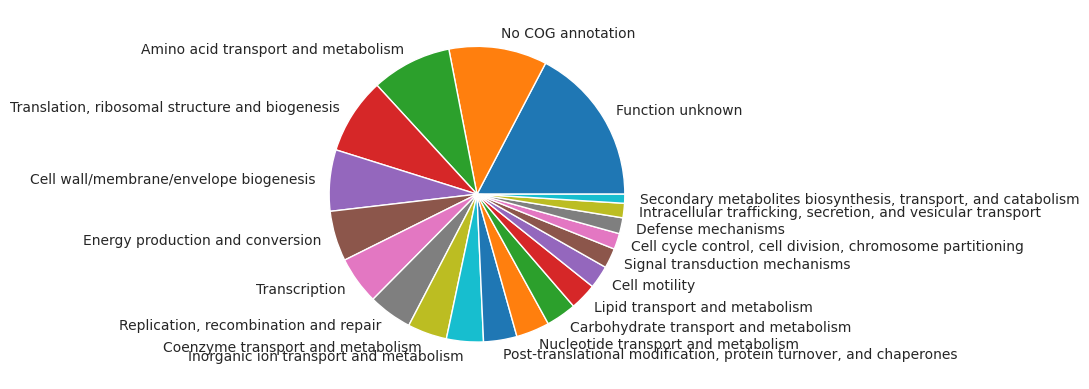

In [39]:
# Fill missing COGs with X
DF_annot['COG'].fillna('X',inplace=True)
DF_annot['COG'] = DF_annot['COG'].str.replace('-', 'X')

# Change single letter COG annotation to full description
DF_annot['COG'] = DF_annot.COG.apply(cog2str)

counts = DF_annot.COG.value_counts()
plt.pie(counts.values,labels=counts.index);

Uncomment the following line to save the gene annotation dataset

In [40]:
DF_annot.to_csv(os.path.join('..','data','processed_data','gene_info.csv'))

## GO Annotations

To start, download the GO Annotations for your organism from AmiGO 2

1. Go to [AmiGO 2](http://amigo.geneontology.org/amigo/search/annotation)
1. Filter for your organism
1. Click ``CustomDL``
1. Drag ``GO class (direct)`` to the end of your Selected Fields
1. Enter the location of your GO annotation file below and run the following code block

In [41]:
go_file = os.path.join('..','data','external','GO_annotations.txt')

In [42]:
DF_GO = pd.read_csv(go_file,sep='\t',header=None,usecols=[2,17])
DF_GO.columns = ['gene_name','gene_ontology']
DF_GO.head()

,gene_name,gene_ontology
0,arsR,regulation of DNA-templated transcription
1,arsB,arsenite transmembrane transporter activity
2,arsB,antimonite transmembrane transporter activity
3,arsB,antiporter activity
4,arsB,plasma membrane


Convert the gene names to gene locus tags, and drop gene names that cannot be converted

In [43]:
name2num = {v:k for k,v in DF_annot.gene_name.to_dict().items()}

In [44]:
DF_GO['gene_id'] = [name2num[x] if x in name2num.keys() else None for x in DF_GO.gene_name]

In [45]:
DF_GO.head()

,gene_name,gene_ontology,gene_id
0,arsR,regulation of DNA-templated transcription,None
1,arsB,arsenite transmembrane transporter activity,None
2,arsB,antimonite transmembrane transporter activity,None
3,arsB,antiporter activity,None
4,arsB,plasma membrane,None


Now we remove null entries

In [46]:
DF_GO = DF_GO[DF_GO.gene_id.notnull()]

In [47]:
DF_GO.head()

,gene_name,gene_ontology,gene_id
45,efp,cytoplasm,ZCP4_0936
46,efp,translation elongation factor activity,ZCP4_0936
65,hisH,imidazoleglycerol-phosphate synthase activity,ZCP4_1645
73,rpe,metal ion binding,ZCP4_1199
74,rpe,"pentose-phosphate shunt, non-oxidative branch",ZCP4_1199


Uncomment the line below to save the annotations

In [48]:
DF_GO[['gene_id','gene_name','gene_ontology']].to_csv(os.path.join('..','data','external','GO_annotations_curated.csv'))

# playground

In [ ]:
df = DF_annot[DF_annot['anaero_xylose_model_flux'] != '']
plt.scatter(df['aerobic_essential'], df['aero_glucose_model_growth_perc_change'])
plt.show()